In [1]:
""" 
The data given in the url  is related with direct marketing campaigns of a banking institution. 
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was 
required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 
Build a model to predict whether client will subscribe to term deposit
"""

from sklearn.metrics import accuracy_score
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('bank.csv',delimiter = ';')

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


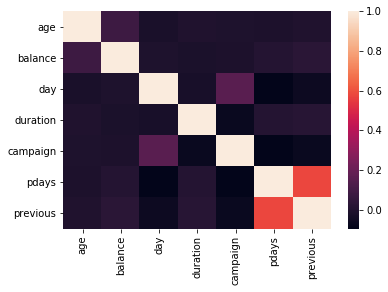

In [5]:
#Visualising correlationa
sb.heatmap(data.corr())

In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
data.skew()

age         0.699501
balance     6.596431
day         0.094627
duration    2.772420
campaign    4.743914
pdays       2.717071
previous    5.875259
dtype: float64

In [8]:
data['age'] = np.log(data['age'])
data['duration'] = np.cbrt(data['duration'])
data['campaign'] = np.log(data['campaign'])
data['previous'] = np.cbrt(data['previous'])

In [9]:
#As there is less correlation between the data dropping some of the columns of the data which have values 'unkown' 
data.drop(['poutcome','contact'],axis=1,inplace=True)
data['a0'] = np.ones((len(data),1))
data.y.replace(('yes', 'no'), (1, 0), inplace = True)

In [10]:
data=pd.get_dummies(data=data,drop_first=True)
data = data.reindex(columns = sorted(data.columns))
data.head()

,a0,age,balance,campaign,day,default_yes,duration,education_secondary,education_tertiary,education_unknown,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,pdays,previous,y
0,1.0,3.401197,1787,0.000000,19,0,4.290840,0,0,0,...,0,0,0,0,0,1,0,-1,0.000000,0
1,1.0,3.496508,4789,0.000000,11,0,6.036811,1,0,0,...,0,0,0,1,0,0,0,339,1.587401,0
2,1.0,3.555348,1350,0.000000,16,0,5.698019,0,1,0,...,0,0,0,0,0,0,0,330,1.000000,0
3,1.0,3.401197,1476,1.386294,3,0,5.838272,0,1,0,...,0,1,0,0,0,0,0,-1,0.000000,0
4,1.0,4.077537,0,0.000000,5,0,6.091199,1,0,0,...,0,0,0,1,0,0,0,-1,0.000000,0


In [11]:
data['age'] = (data['age'] - data['age'].mean())/(data['age'].std())
data['balance'] = (data['balance'] - data['balance'].mean())/(data['balance'].std())
data['day'] = (data['day'] - data['day'].mean())/(data['day'].std())
data['duration'] = (data['duration'] - data['duration'].mean())/(data['duration'].std())
data['campaign'] = (data['campaign'] - data['campaign'].mean())/(data['campaign'].std())
data['pdays'] = (data['pdays'] - data['pdays'].mean())/(data['pdays'].std())
data['previous'] = (data['previous'] - data['previous'].mean())/(data['previous'].std())
data.head()

,a0,age,balance,campaign,day,default_yes,duration,education_secondary,education_tertiary,education_unknown,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,pdays,previous,y
0,1.0,-1.131234,0.121058,-0.997176,0.374011,0,-0.893268,0,0,0,...,0,0,0,0,0,1,0,-0.407173,-0.450500,0
1,1.0,-0.752455,1.118521,-0.997176,-0.595961,0,0.083070,1,0,0,...,0,0,0,1,0,0,0,2.988713,2.491223,0
2,1.0,-0.518613,-0.024142,-0.997176,0.010271,0,-0.106381,0,1,0,...,0,0,0,0,0,0,0,2.898822,1.402669,0
3,1.0,-1.131234,0.017724,0.936628,-1.565932,0,-0.027952,0,1,0,...,0,1,0,0,0,0,0,-0.407173,-0.450500,0
4,1.0,1.556655,-0.472701,-0.997176,-1.323439,0,0.113484,1,0,0,...,0,0,0,1,0,0,0,-0.407173,-0.450500,0


In [12]:
type(data[list(data.columns)[0]][0])


numpy.float64

In [13]:
data.shape

(4521, 39)

In [14]:
Training_data = int(0.70*len(data))
Train_data = data.iloc[0:Training_data,:]
Test_data = data.iloc[Training_data:,:]


x_train,y_train,x_test,y_test = np.array(Train_data.iloc[:,0:38]),np.array(Train_data.iloc[:,-1:]),np.array(Test_data.iloc[:,0:38]),np.array(Test_data.iloc[:,-1:])

In [15]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((3164, 38), (3164, 1), (1357, 38), (1357, 1))

In [16]:
np.random.seed(0)
theta = np.random.rand(38)

In [17]:
theta = np.reshape(theta,(38,1))

In [18]:
def model(x_train,y_train,theta):
    learning_rate = 0.001
    epochs = 4000
    n = len(x_train)


    for epoch in range(epochs):
        y_pred = np.dot(x_train ,theta)
        temp = y_pred - y_train
        product = (learning_rate / n) * np.dot(x_train.T,temp)
        theta = theta - product
        cost = (1 / (2 * n)) * np.dot(temp.T, temp)
        #print(cost)
    return theta


In [19]:
theta = model(x_train,y_train,theta)
Y = np.dot(x_test,theta)

In [20]:
def sigmoid(z):
    sigmoid = 1 / (1 + np.exp(-z))
    return sigmoid

S=sigmoid(Y)
print(S)

[[0.58492583]
 [0.49836797]
 [0.36036887]
 ...
 [0.5761776 ]
 [0.61630052]
 [0.63982953]]


In [21]:
def check_prediction(z):
    prediction = [ ]
    for element in z:
        if element >= 0.5:
            prediction.append(1)
        else:
            prediction.append(0)
    return prediction
x = check_prediction(S)

In [22]:
def check_accuracy(x):
    accuracy = 0
    for element in range(len(x)):
        if(y_test[element] == x[element]):
            accuracy +=1
    accuracy = (accuracy / len(x)) * 100
    return accuracy

accuracy = check_accuracy(x)
print(accuracy)

46.05747973470892


In [23]:
score = accuracy_score(y_test,x)
score

0.46057479734708917